### Support Vector Machine (SVM)

#### Introduction
Support Vector Machine (SVM) is a supervised learning algorithm used for classification and regression tasks. It finds the hyperplane that best separates the classes in the feature space.

#### How SVM Works
1. **Hyperplane**: The decision boundary that separates different classes.
2. **Support Vectors**: Data points that are closest to the hyperplane and influence its position.
3. **Margin**: The distance between the hyperplane and the nearest data points from either class. SVM aims to maximize this margin.

#### Advantages
- Effective in high-dimensional spaces.
- Works well with clear margin of separation.
- Robust to overfitting, especially in high-dimensional space.

#### Disadvantages
- Not suitable for large datasets.
- Poor performance with overlapping classes.
- Requires careful tuning of parameters.

#### Steps to Build an SVM Model
1. **Data Preparation**: Clean the data and handle missing values.
2. **Train-Test Split**: Split the dataset into training and test sets.
3. **Model Training**: Train the SVM model using the training data.
4. **Model Evaluation**: Assess the performance using appropriate metrics.
5. **Hyperparameter Tuning**: Optimize parameters like kernel type, C, and gamma.

Accuracy: 100.00%

Classification Report:
              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        19
  versicolor       1.00      1.00      1.00        13
   virginica       1.00      1.00      1.00        13

    accuracy                           1.00        45
   macro avg       1.00      1.00      1.00        45
weighted avg       1.00      1.00      1.00        45


Confusion Matrix:
[[19  0  0]
 [ 0 13  0]
 [ 0  0 13]]


ValueError: The truth value of an array with more than one element is ambiguous. Use a.any() or a.all()

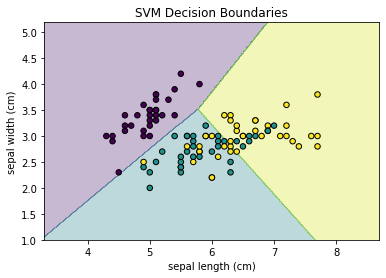

In [4]:
# Import necessary libraries
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import matplotlib.pyplot as plt
import numpy as np

# Load the Iris dataset
iris = datasets.load_iris()
X = iris.data
y = iris.target

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Initialize the SVM model with a linear kernel
svm = SVC(kernel='linear', C=1.0, random_state=42)

# Train the model
svm.fit(X_train, y_train)

# Make predictions on the test data
y_pred = svm.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy * 100:.2f}%')

print("\nClassification Report:")
print(classification_report(y_test, y_pred, target_names=iris.target_names))

print("\nConfusion Matrix:")
print(confusion_matrix(y_test, y_pred))

# Plot the decision boundaries for the first two features
def plot_decision_boundaries(X, y, model, title='Decision Boundaries'):
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.01),
                         np.arange(y_min, y_max, 0.01))
    
    Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    
    plt.contourf(xx, yy, Z, alpha=0.3)
    scatter = plt.scatter(X[:, 0], X[:, 1], c=y, s=30, edgecolor='k')
    plt.xlabel(iris.feature_names[0])
    plt.ylabel(iris.feature_names[1])
    plt.title(title)
    plt.legend(handles=scatter.legend_elements()[0], labels=iris.target_names)
    plt.show()

# Visualize decision boundaries for the first two features
plot_decision_boundaries(X_train[:, :2], y_train, SVC(kernel='linear').fit(X_train[:, :2], y_train), title='SVM Decision Boundaries')


### Explanation of the Code
1. **Loading the Dataset**: We use the Iris dataset, which is a common dataset for classification problems.
2. **Train-Test Split**: We split the dataset into training and test sets to evaluate the performance of our model.
3. **Model Initialization**: We create an instance of the SVM model with a linear kernel.
4. **Training the Model**: We fit the SVM model using the training data.
5. **Making Predictions**: We use the trained model to predict the labels of the test set.
6. **Evaluating the Model**: We use accuracy, classification report, and confusion matrix to evaluate the model's performance.
7. **Visualizing Decision Boundaries**: We visualize the decision boundaries for the first two features to understand how the SVM separates the classes.
